<a href="https://colab.research.google.com/github/Nick-Yazdani/ml-notebooks-portfolio/blob/main/dog_vs_cat_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 70 bytes


In [4]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download "tongpython/cat-and-dog"

 95% 207M/218M [00:01<00:00, 185MB/s]
100% 218M/218M [00:01<00:00, 161MB/s]


In [7]:
!unzip -qq cat-and-dog.zip

In [9]:
!rm cat-and-dog.zip

In [37]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory, plot_model

In [15]:
TRAIN_DIRECTORY = "training_set/training_set"
TEST_DIRECTORY = "test_set/test_set"

BATCH_SIZE = 64
IMAGE_SHAPE = (64, 64, 3)

In [35]:
train_dataset = image_dataset_from_directory(TRAIN_DIRECTORY, validation_split=0.2, subset="training", seed=42, image_size=IMAGE_SHAPE[:-1], batch_size=BATCH_SIZE)
validation_dataset = image_dataset_from_directory(TRAIN_DIRECTORY, validation_split=0.2, subset="validation", seed=42, image_size=IMAGE_SHAPE[:-1], batch_size=BATCH_SIZE)
test_dataset = image_dataset_from_directory(TEST_DIRECTORY, image_size=IMAGE_SHAPE[:-1], batch_size=BATCH_SIZE)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

In [20]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
def build_model(img_shape):
  image_input = layers.Input(shape=img_shape)
  x = layers.Rescaling(1./255)(image_input)
  x = layers.Conv2D(16, 3, padding="same", activation="relu")(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dense(1)(x)

  model = tf.keras.models.Model(image_input, x)
  
  model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

  return model

In [32]:
model = build_model(IMAGE_SHAPE)

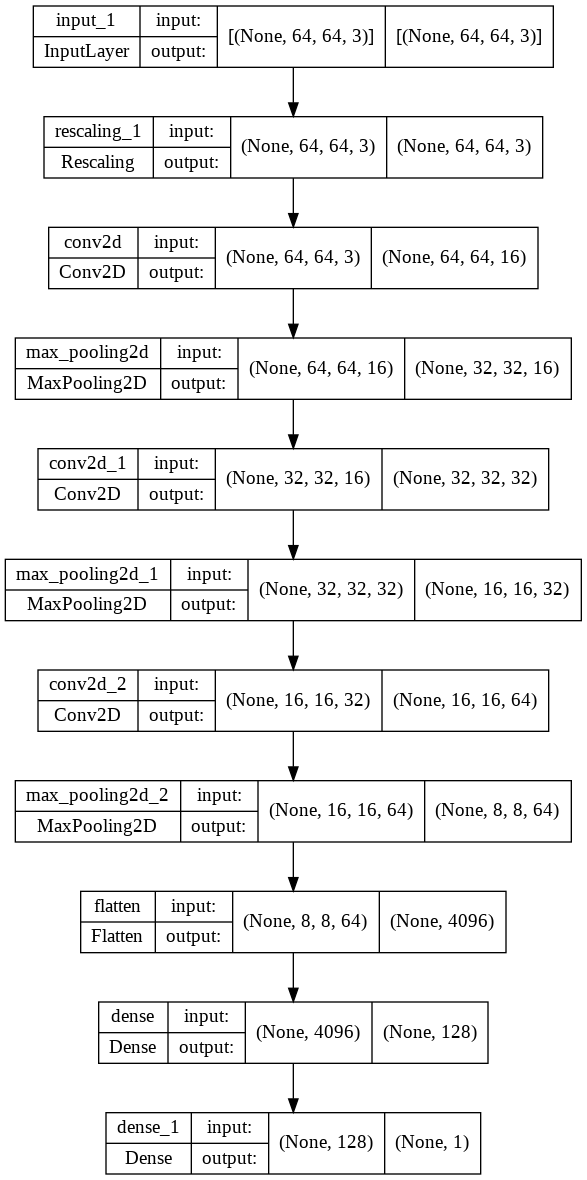

In [30]:
plot_model(model, show_shapes=True)

In [33]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
101/101 [==============================] - 38s 309ms/step - loss: 0.6806 - accuracy: 0.5247 - val_loss: 0.6255 - val_accuracy: 0.5721
Epoch 2/10
101/101 [==============================] - 28s 274ms/step - loss: 0.5874 - accuracy: 0.6663 - val_loss: 0.5591 - val_accuracy: 0.6758
Epoch 3/10
101/101 [==============================] - 28s 281ms/step - loss: 0.5306 - accuracy: 0.7235 - val_loss: 0.5275 - val_accuracy: 0.7071
Epoch 4/10
101/101 [==============================] - 28s 273ms/step - loss: 0.4857 - accuracy: 0.7481 - val_loss: 0.5029 - val_accuracy: 0.7408
Epoch 5/10
101/101 [==============================] - 29s 283ms/step - loss: 0.4421 - accuracy: 0.7764 - val_loss: 0.5044 - val_accuracy: 0.7676
Epoch 6/10
101/101 [==============================] - 27s 272ms/step - loss: 0.4184 - accuracy: 0.7912 - val_loss: 0.4995 - val_accuracy: 0.7839
Epoch 7/10
101/101 [==============================] - 28s 274ms/step - loss: 0.3690 - accuracy: 0.8298 - val_loss: 0.5257 - val_ac

In [42]:
f"{round(model.evaluate(test_dataset, verbose=0)[1], 4) * 100}% accuracy on test set" 

'78.84% accuracy on test set'